# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import style

# Data Loading and preprocessing

In [2]:
data = pd.read_csv("Desktop/Air_Quality_Monitoring_Data.csv")

In [3]:
data.head()

,Name,GPS,DateTime,NO2,O3_1hr,O3_4hr,CO,PM10,PM2.5,AQI_CO,AQI_NO2,AQI_O3_1hr,AQI_O3_4hr,AQI_PM10,AQI_PM2.5,AQI_Site,Date,Time
0,Monash,"(-35.418302, 149.094018)",07/04/2020 06:00:00 PM,0.000,0.024,0.027,0.00,6.12,3.60,0.0,0.0,24.0,34.0,12.0,14.0,34.0,07 April 2020,18:00:00
1,Civic,"(-35.285307, 149.131579)",07/04/2020 06:00:00 PM,NaN,0.013,0.019,0.00,7.57,4.33,0.0,0.0,13.0,24.0,15.0,17.0,24.0,07 April 2020,18:00:00
2,Florey,"(-35.220606, 149.043539)",07/04/2020 06:00:00 PM,0.006,0.020,0.025,0.08,8.02,6.40,0.0,5.0,20.0,32.0,16.0,25.0,32.0,07 April 2020,18:00:00
3,Civic,"(-35.285307, 149.131579)",07/04/2020 08:00:00 PM,NaN,0.007,0.013,0.00,7.92,4.57,0.0,0.0,7.0,16.0,15.0,18.0,18.0,07 April 2020,20:00:00
4,Monash,"(-35.418302, 149.094018)",07/04/2020 08:00:00 PM,0.018,0.002,0.015,0.01,6.85,3.69,0.0,15.0,2.0,19.0,13.0,14.0,19.0,07 April 2020,20:00:00


In [4]:
data.shape

(189648, 18)

In [5]:
len(data)

189648

In [6]:
data_na = list(data.isnull().sum())
data.isnull().sum()

Name              0
GPS               1
DateTime          0
NO2           61321
O3_1hr         9907
O3_4hr        11874
CO            58054
PM10           7493
PM2.5         36104
AQI_CO        58002
AQI_NO2       53124
AQI_O3_1hr    10325
AQI_O3_4hr    12119
AQI_PM10       7520
AQI_PM2.5     36101
AQI_Site        952
Date              0
Time              0
dtype: int64

In [7]:
for i in range(len(data_na)):
    print(len(data) - data_na[i])

189648
189647
189648
128327
179741
177774
131594
182155
153544
131646
136524
179323
177529
182128
153547
188696
189648
189648


In [8]:
# We can drop the nan features training example

In [9]:
data_new = data.dropna()

In [10]:
print("Original length of data = ", len(data))
print("Data after elimination = " , len(data_new))
print("Difference is = " , len(data) - len(data_new))

Original length of data =  189648
Data after elimination =  92816
Difference is =  96832


# Feature selection

In [11]:
data_new.head()

,Name,GPS,DateTime,NO2,O3_1hr,O3_4hr,CO,PM10,PM2.5,AQI_CO,AQI_NO2,AQI_O3_1hr,AQI_O3_4hr,AQI_PM10,AQI_PM2.5,AQI_Site,Date,Time
0,Monash,"(-35.418302, 149.094018)",07/04/2020 06:00:00 PM,0.000,0.024,0.027,0.00,6.12,3.60,0.0,0.0,24.0,34.0,12.0,14.0,34.0,07 April 2020,18:00:00
2,Florey,"(-35.220606, 149.043539)",07/04/2020 06:00:00 PM,0.006,0.020,0.025,0.08,8.02,6.40,0.0,5.0,20.0,32.0,16.0,25.0,32.0,07 April 2020,18:00:00
4,Monash,"(-35.418302, 149.094018)",07/04/2020 08:00:00 PM,0.018,0.002,0.015,0.01,6.85,3.69,0.0,15.0,2.0,19.0,13.0,14.0,19.0,07 April 2020,20:00:00
5,Florey,"(-35.220606, 149.043539)",07/04/2020 08:00:00 PM,0.015,0.002,0.016,0.12,8.38,6.49,1.0,12.0,2.0,20.0,16.0,25.0,25.0,07 April 2020,20:00:00
6,Florey,"(-35.220606, 149.043539)",07/04/2020 09:00:00 PM,0.009,0.007,0.011,0.13,8.42,6.63,1.0,8.0,7.0,13.0,16.0,26.0,26.0,07 April 2020,21:00:00


In [12]:
data_new.iloc[:,3:4].values

array([[0.   ],
       [0.006],
       [0.018],
       ...,
       [0.01 ],
       [0.   ],
       [0.   ]])

In [13]:
no2 = data_new.iloc[0:60000,3:4].values
o3_1hrs = data_new.iloc[0:60000,4:5].values
o3_4hrs = data_new.iloc[0:60000,5:6].values
co = data_new.iloc[0:60000,6:7].values
pm10 = data_new.iloc[0:60000,7:8].values
pm2 = data_new.iloc[0:60000,8:9].values
aqi_co = data_new.iloc[0:60000,9:10].values
aqi_no2 = data_new.iloc[0:60000,10:11].values
aqi_o3_1hrs = data_new.iloc[0:60000,11:12].values
aqi_o3_4hrs = data_new.iloc[0:60000,12:13].values
aqi_pm10 = data_new.iloc[0:60000, 13:14].values
aqi_pm2 = data_new.iloc[0:60000, 14:15].values
aqi_site = data_new.iloc[0:60000 , 15:16].values

# Data Visualization

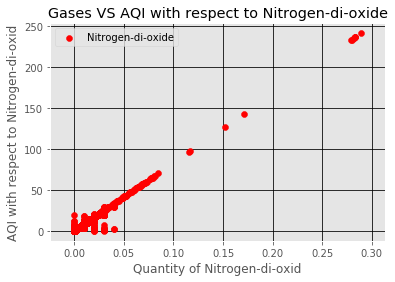

In [14]:
plt.style.use("ggplot")
plt.scatter(no2 , aqi_no2 , label = "Nitrogen-di-oxide", color = "red")
plt.xlabel("Quantity of Nitrogen-di-oxid" )
plt.ylabel("AQI with respect to Nitrogen-di-oxid")
plt.title("Gases VS AQI with respect to Nitrogen-di-oxide")
plt.grid( color = "black")
plt.legend()

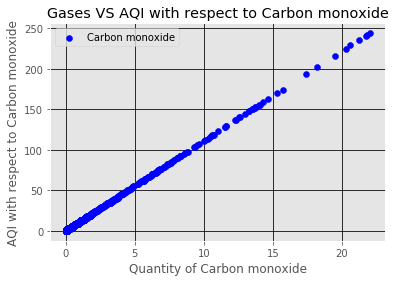

In [15]:
plt.grid( color = "black")
plt.style.use("ggplot")
plt.scatter(co , aqi_co , label = "Carbon monoxide", color = "blue")
plt.xlabel("Quantity of Carbon monoxide")
plt.ylabel("AQI with respect to Carbon monoxide")
plt.title("Gases VS AQI with respect to Carbon monoxide")
plt.legend()

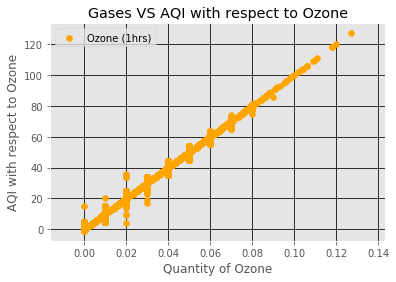

In [16]:
plt.grid( color = "black")
plt.style.use("ggplot")
plt.scatter(o3_1hrs , aqi_o3_1hrs , label = "Ozone (1hrs)" , color = "orange")
plt.xlabel("Quantity of Ozone")
plt.ylabel("AQI with respect to Ozone")
plt.title("Gases VS AQI with respect to Ozone")
plt.legend()

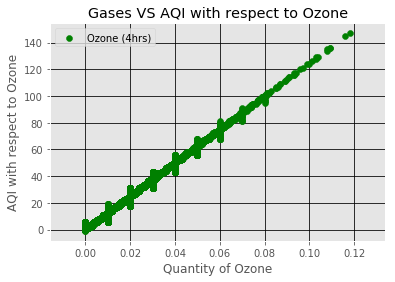

In [17]:
plt.grid( color = "black")
plt.style.use("ggplot")
plt.scatter(o3_4hrs , aqi_o3_4hrs , label = "Ozone (4hrs)" , color = "green")
plt.xlabel("Quantity of Ozone")
plt.ylabel("AQI with respect to Ozone")
plt.title("Gases VS AQI with respect to Ozone")
plt.legend()

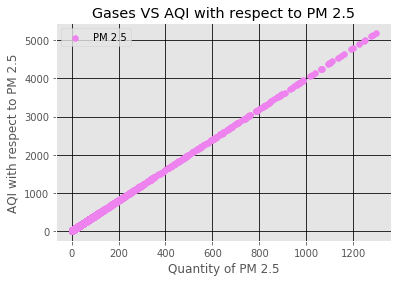

In [18]:
plt.grid( color = "black")
plt.style.use("ggplot")
plt.scatter(pm2 , aqi_pm2 , label = "PM 2.5" , color = "violet")
plt.xlabel("Quantity of PM 2.5")
plt.ylabel("AQI with respect to PM 2.5")
plt.title("Gases VS AQI with respect to PM 2.5")
plt.legend()

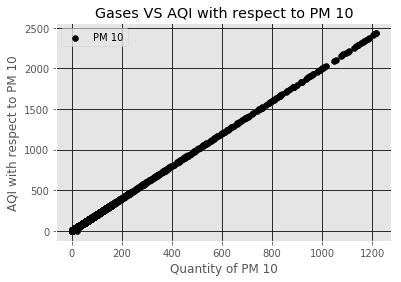

In [19]:
plt.grid( color = "black")
plt.style.use("ggplot")
plt.scatter(pm10 , aqi_pm10 , label = "PM 10", color = "black")
plt.xlabel("Quantity of PM 10")
plt.ylabel("AQI with respect to PM 10")
plt.title("Gases VS AQI with respect to PM 10")
plt.legend()

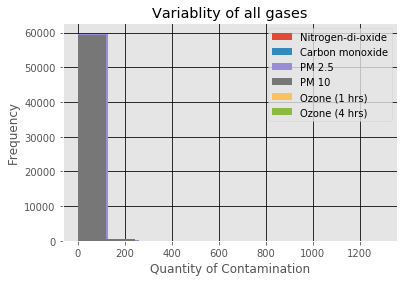

In [20]:
plt.grid( color = "black")
plt.style.use("ggplot")
plt.hist(no2 , label = "Nitrogen-di-oxide")
plt.hist(co , label = "Carbon monoxide")
plt.hist(pm2 , label = "PM 2.5")
plt.hist(pm10 , label = "PM 10")
plt.hist(o3_1hrs , label = "Ozone (1 hrs)")
plt.hist(o3_4hrs , label = "Ozone (4 hrs)")
plt.xlabel("Quantity of Contamination")
plt.ylabel("Frequency")
plt.title("Variablity of all gases")
plt.legend()

In [21]:
# variablity is almost same

# Applying Linear Regression for the following predictions

In [22]:
# 1 For NO2

In [23]:
no2_train , no2_test , aqi_no2_train , aqi_no2_test = train_test_split(no2 , aqi_no2 , test_size = 1/3 , random_state = 101)

In [24]:
"""sc = StandardScaler()
no2_train = sc.fit_transform(no2_train)
aqi_no2_train = sc.fit_transform(aqi_no2_train)
no2_test = sc.fit_transform(no2_test)
aqi_no2_test = sc.fit_transform(aqi_no2_test)"""

'sc = StandardScaler()\nno2_train = sc.fit_transform(no2_train)\naqi_no2_train = sc.fit_transform(aqi_no2_train)\nno2_test = sc.fit_transform(no2_test)\naqi_no2_test = sc.fit_transform(aqi_no2_test)'

In [25]:
print("Number of traing data of x = ",len(no2_train))
print("Number training data of y = ",len(aqi_no2_train))
print("Number of test data of x = ",len(no2_test))
print("Number of test data of y",len(aqi_no2_test))

Number of traing data of x =  40000
Number training data of y =  40000
Number of test data of x =  20000
Number of test data of y 20000


In [26]:
no2_lr = LinearRegression()

In [27]:
no2_lr.fit(no2_train,aqi_no2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
no2_lr.score(no2_train,aqi_no2_train) # accuracy with training dataset

0.9152488550735746

In [29]:
no2_lr.score(no2_test,aqi_no2_test) # accuracy with testing dataset

0.9347649977952377

In [30]:
no2_lr.score(no2,aqi_no2) # accuracy with overall processed data

0.9230088901694322

In [31]:
no2_lr.score(data_new.iloc[:,3:4] , data_new.iloc[:,10:11]) # accuracy with overall raw data

0.8905635698064296

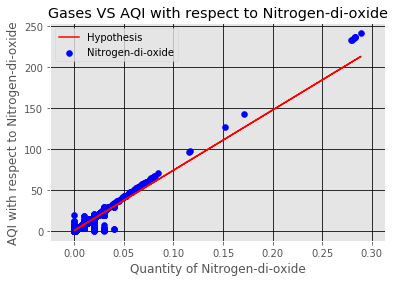

In [32]:
plt.grid( color = "black")
plt.style.use("ggplot")
plt.scatter(no2, aqi_no2 , label = "Nitrogen-di-oxide" , color = "blue")
plt.plot(no2_test, no2_lr.predict(no2_test), color = "red" , label = "Hypothesis")
plt.xlabel("Quantity of Nitrogen-di-oxide" )
plt.ylabel("AQI with respect to Nitrogen-di-oxide")
plt.title("Gases VS AQI with respect to Nitrogen-di-oxide")
plt.legend()

In [33]:
# 2 for co

In [34]:
co_train , co_test , aqi_co_train , aqi_co_test = train_test_split(co , aqi_co , test_size = 1/3 , random_state = 101)

In [35]:
print("Number of traing data of x = ",len(no2_train))
print("Number training data of y = ",len(aqi_no2_train))
print("Number of test data of x = ",len(no2_test))
print("Number of test data of y",len(aqi_no2_test))

Number of traing data of x =  40000
Number training data of y =  40000
Number of test data of x =  20000
Number of test data of y 20000


In [36]:
co_lr = LinearRegression()

In [37]:
co_lr.fit(co_train,aqi_co_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [38]:
co_lr.score(co_train,aqi_co_train) # accuracy with training dataset

0.997613175111423

In [39]:
co_lr.score(co_test,aqi_co_test) # accuracy with testing dataset

0.9972064675378085

In [40]:
co_lr.score(co,aqi_co) # accuracy with overall processed data

0.9974904707219682

In [41]:
co_lr.score(data_new.iloc[:,6:7] , data_new.iloc[:,9:10]) # accuracy with overall raw data

0.9957096915320747

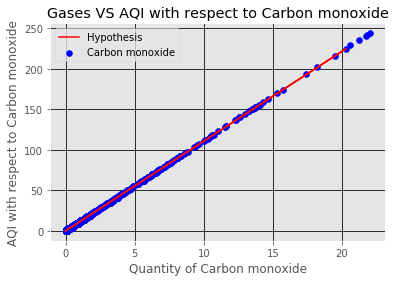

In [42]:
plt.grid( color = "black")
plt.style.use("ggplot")
plt.scatter(co, aqi_co, label= "Carbon monoxide", color = "blue")
plt.plot(co_test, co_lr.predict(co_test), color = "red" , label = "Hypothesis")
plt.xlabel("Quantity of Carbon monoxide")
plt.ylabel("AQI with respect to Carbon monoxide")
plt.title("Gases VS AQI with respect to Carbon monoxide")
plt.legend()

In [43]:
# 3 for ozone

In [44]:
o3_1hrs_train , o3_1hrs_test , aqi_o3_1hrs_train , aqi_o3_1hrs_test = train_test_split(o3_1hrs , aqi_o3_1hrs , test_size = 1/3 , random_state = 101)

In [45]:
print("Number of traing data of x = ",len(o3_1hrs_train))
print("Number training data of y = ",len(aqi_o3_1hrs_train))
print("Number of test data of x = ",len(o3_1hrs_test))
print("Number of test data of y",len(aqi_o3_1hrs_test))

Number of traing data of x =  40000
Number training data of y =  40000
Number of test data of x =  20000
Number of test data of y 20000


In [46]:
o3_1hrs_lr = LinearRegression()
o3_1hrs_lr.fit(o3_1hrs_train , aqi_o3_1hrs_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [47]:
print("accuracy with training dataset = ",o3_1hrs_lr.score(o3_1hrs_train,aqi_o3_1hrs_train))  
print("accuracy with testing dataset = ",o3_1hrs_lr.score(o3_1hrs_test,aqi_o3_1hrs_test)) 
print("accuracy with overall processed data = ",o3_1hrs_lr.score(o3_1hrs,aqi_o3_1hrs)) 
print("accuracy with overall raw data = ",o3_1hrs_lr.score(data_new.iloc[:,4:5] , data_new.iloc[:,11:12])) 

accuracy with training dataset =  0.966029745857722
accuracy with testing dataset =  0.9663170443993082
accuracy with overall processed data =  0.9661261989900768
accuracy with overall raw data =  -17.599496665553062


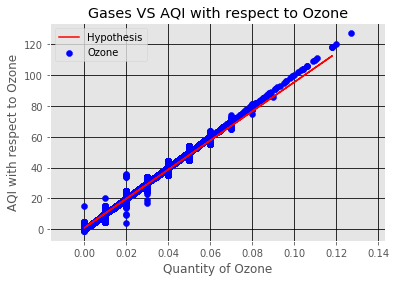

In [48]:
plt.grid( color = "black")
plt.style.use("ggplot")
plt.scatter(o3_1hrs, aqi_o3_1hrs, label = "Ozone", color = "blue")
plt.plot(o3_1hrs_test, o3_1hrs_lr.predict(o3_1hrs_test), color = "red" , label = "Hypothesis")
plt.xlabel("Quantity of Ozone")
plt.ylabel("AQI with respect to Ozone")
plt.title("Gases VS AQI with respect to Ozone")
plt.legend()

In [49]:
# 4 for ozone of 4 hrs

In [50]:
o3_4hrs_train , o3_4hrs_test , aqi_o3_4hrs_train , aqi_o3_4hrs_test = train_test_split(o3_4hrs , aqi_o3_4hrs , test_size = 1/3 , random_state = 101)

In [51]:
print("Number of traing data of x = ",len(o3_4hrs_train))
print("Number training data of y = ",len(aqi_o3_4hrs_train))
print("Number of test data of x = ",len(o3_4hrs_test))
print("Number of test data of y",len(aqi_o3_4hrs_test))

Number of traing data of x =  40000
Number training data of y =  40000
Number of test data of x =  20000
Number of test data of y 20000


In [52]:
o3_4hrs_lr = LinearRegression()
o3_4hrs_lr.fit(o3_4hrs_train , aqi_o3_4hrs_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [53]:
print("accuracy with training dataset = ",o3_4hrs_lr.score(o3_4hrs_train,aqi_o3_4hrs_train))  
print("accuracy with testing dataset = ",o3_4hrs_lr.score(o3_4hrs_test,aqi_o3_4hrs_test)) 
print("accuracy with overall processed data = ",o3_4hrs_lr.score(o3_4hrs,aqi_o3_4hrs)) 
print("accuracy with overall raw data = ",o3_4hrs_lr.score(data_new.iloc[:,5:6] , data_new.iloc[:,12:13])) 

accuracy with training dataset =  0.9604830920149079
accuracy with testing dataset =  0.9605750505795245
accuracy with overall processed data =  0.9605147637719499
accuracy with overall raw data =  0.9560022303029994


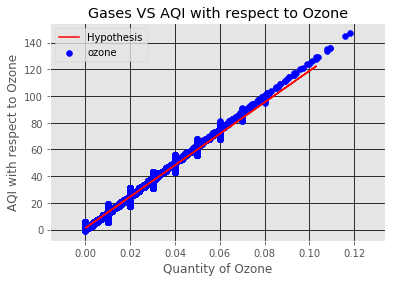

In [54]:
plt.grid( color = "black")
plt.style.use("ggplot")
plt.scatter(o3_4hrs, aqi_o3_4hrs ,label = "ozone", color = "blue")
plt.plot(o3_4hrs_test, o3_4hrs_lr.predict(o3_4hrs_test), color = "red" , label = "Hypothesis")
plt.xlabel("Quantity of Ozone")
plt.ylabel("AQI with respect to Ozone")
plt.title("Gases VS AQI with respect to Ozone")
plt.legend()

In [55]:
# 5 for PM 2.5

In [56]:
pm2_train , pm2_test , aqi_pm2_train , aqi_pm2_test = train_test_split(pm2 , aqi_pm2 , test_size = 1/3 , random_state = 101)

In [57]:
print("Number of traing data of x = ",len(pm2_train))
print("Number training data of y = ",len(aqi_pm2_train))
print("Number of test data of x = ",len(pm2_test))
print("Number of test data of y",len(aqi_pm2_test))

Number of traing data of x =  40000
Number training data of y =  40000
Number of test data of x =  20000
Number of test data of y 20000


In [58]:
pm2_lr = LinearRegression()

In [59]:
pm2_lr.fit(pm2_train , aqi_pm2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [60]:
print("accuracy with training dataset = ",pm2_lr.score(pm2_train,aqi_pm2_train))  
print("accuracy with testing dataset = ",pm2_lr.score(pm2_test,aqi_pm2_test)) 
print("accuracy with overall processed data = ",pm2_lr.score(pm2,aqi_pm2)) 
print("accuracy with overall raw data = ",pm2_lr.score(data_new.iloc[:,8:9] , data_new.iloc[:,14:15])) 

accuracy with training dataset =  0.9999711852377214
accuracy with testing dataset =  0.999964900210528
accuracy with overall processed data =  0.9999693359764797
accuracy with overall raw data =  0.9999394189279602


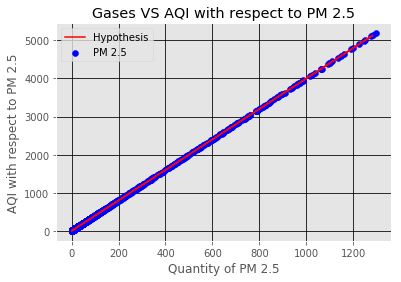

In [61]:
plt.grid( color = "black")
plt.style.use("ggplot")
plt.scatter(pm2, aqi_pm2, label = "PM 2.5" , color = "blue")
plt.plot(pm2_test, pm2_lr.predict(pm2_test), color = "red", label = "Hypothesis")
plt.xlabel("Quantity of PM 2.5")
plt.ylabel("AQI with respect to PM 2.5")
plt.title("Gases VS AQI with respect to PM 2.5")
plt.legend()

In [62]:
# for PM 10

In [63]:
pm10_train , pm10_test , aqi_pm10_train , aqi_pm10_test = train_test_split(pm10 , aqi_pm10 , test_size = 1/3 , random_state = 101)

In [64]:
print("Number of traing data of x = ",len(pm10_train))
print("Number training data of y = ",len(aqi_pm10_train))
print("Number of test data of x = ",len(pm10_test))
print("Number of test data of y",len(aqi_pm10_test))

Number of traing data of x =  40000
Number training data of y =  40000
Number of test data of x =  20000
Number of test data of y 20000


In [65]:
pm10_lr = LinearRegression()
pm10_lr.fit(pm10_train , aqi_pm10_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [66]:
print("accuracy with training dataset = ",pm10_lr.score(pm10_train,aqi_pm10_train))  
print("accuracy with testing dataset = ",pm10_lr.score(pm10_test,aqi_pm10_test)) 
print("accuracy with overall processed data = ",pm10_lr.score(pm10,aqi_pm10)) 
print("accuracy with overall raw data = ",pm10_lr.score(data_new.iloc[:,7:8] , data_new.iloc[:,13:14])) 

accuracy with training dataset =  0.9999591890138536
accuracy with testing dataset =  0.9999562364697908
accuracy with overall processed data =  0.999958313251751
accuracy with overall raw data =  0.9999092271571615


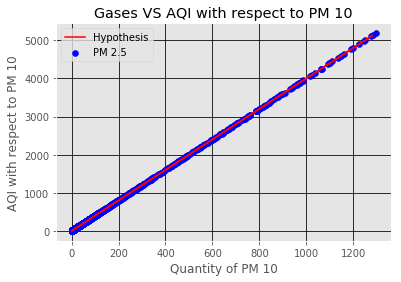

In [67]:
plt.grid( color = "black")
plt.style.use("ggplot")
plt.scatter(pm2, aqi_pm2 , label = "PM 2.5", color = "blue")
plt.plot(pm2_test, pm2_lr.predict(pm2_test), color = "red" , label = "Hypothesis")
plt.xlabel("Quantity of PM 10")
plt.ylabel("AQI with respect to PM 10")
plt.title("Gases VS AQI with respect to PM 10")
plt.legend()

In [77]:
Weights = [no2_lr.coef_ , co_lr.coef_ , pm2_lr.coef_ , pm10_lr.coef_ , o3_1hrs_lr.coef_ , o3_4hrs_lr.coef_]
Weights_name = ["NO2" , "co" , "PM 2.5" , "PM 10" , "O3 (1hrs)" , "O3 (4hrs)"]

In [78]:
Weights 

[array([[734.32946277]]),
 array([[11.08629996]]),
 array([[4.00033027]]),
 array([[2.00026238]]),
 array([[943.78509056]]),
 array([[1176.19625484]])]

In [80]:
Parameter = [Weights_name , Weights]

In [81]:
Parameter

[['NO2', 'co', 'PM 2.5', 'PM 10', 'O3 (1hrs)', 'O3 (4hrs)'],
 [array([[734.32946277]]),
  array([[11.08629996]]),
  array([[4.00033027]]),
  array([[2.00026238]]),
  array([[943.78509056]]),
  array([[1176.19625484]])]]

In [83]:
#AQI will be the summation of all AQI